In [1]:
# Setup

import os.path as op
import sys
import TDlib as td
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
# Import data

data = pd.read_csv('dataset.csv')

categories = {
    "sex":      {0: "Female",           1: "Male"},
    "cp":       {1: "Typical angina",   2: "Atypical angina",   3: "non-anginal pain",  4: "asymptomatic"},
    "fbs":      {0: "Below",            1: "Above"},
    "restecg":  {0: "Normal",           1: "Abnormal",          2: "hypertrophy"},
    "exang":    {0: "No",               1: "Yes"},
    "slope":    {1: "Upsloping",        2: "Flat",              3: "Downsloping"},
    "thal":     {3: "Normal",           6: "Fixed defect",      7: "Reversable defect"},
    "target":   {0: "Healthy",          1: "Sick"}
}

for key in categories.keys():
    data[key] = data[key].astype("category")

column = "target"

In [3]:
# Visualize data

print(data)

     age sex cp  trestbps  chol fbs restecg  thalach exang  oldpeak slope  ca  \
0     63   1  3       145   233   1       0      150     0      2.3     0   0   
1     37   1  2       130   250   0       1      187     0      3.5     0   0   
2     41   0  1       130   204   0       0      172     0      1.4     2   0   
3     56   1  1       120   236   0       1      178     0      0.8     2   0   
4     57   0  0       120   354   0       1      163     1      0.6     2   0   
..   ...  .. ..       ...   ...  ..     ...      ...   ...      ...   ...  ..   
298   57   0  0       140   241   0       1      123     1      0.2     1   0   
299   45   1  3       110   264   0       1      132     0      1.2     1   0   
300   68   1  0       144   193   1       1      141     0      3.4     1   2   
301   57   1  0       130   131   0       1      115     1      1.2     1   1   
302   57   0  1       130   236   0       0      174     0      0.0     1   1   

    thal target  
0      1 

In [4]:
# Describe data

print(data.describe())

print("On observe 14 variables dans ce jeu de données :")
print([
    "age : ",
    "sex : "
])

              age    trestbps        chol     thalach     oldpeak          ca
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604    0.729373
std      9.082101   17.538143   51.830751   22.905161    1.161075    1.022606
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000    0.000000
75%     61.000000  140.000000  274.500000  166.000000    1.600000    1.000000
max     77.000000  200.000000  564.000000  202.000000    6.200000    4.000000
On observe 14 variables dans ce jeu de données :
['age : ', 'sex : ']


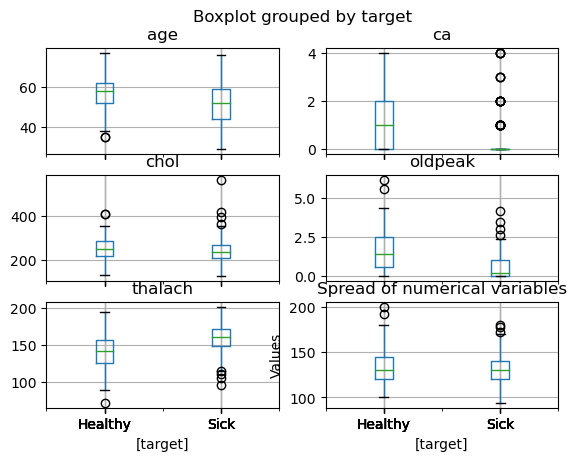

In [5]:
# Display boxplots

td.displayBoxplot(
    td.renameCategories(data, categories),
    column,
    sharey=False
)

In [6]:
# DTC

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.loc[:, data.columns!=column]
Y = data[column]

accuracies = []

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(X, Y)

    dtc = DecisionTreeClassifier(
        criterion="log_loss"
    )
    dtc.fit(x_train, y_train)

    true = y_test
    predict = dtc.predict(x_test)
    accuracy = accuracy_score(true, predict)

    accuracies.append(accuracy)

print(pd.DataFrame(accuracies).describe(percentiles=[]))

                0
count  100.000000
mean     0.750526
std      0.049407
min      0.644737
50%      0.750000
max      0.855263


In [7]:
# Jouer sur :
# max_depth, min_samples_leaf, criterion, ccp_alpha

# ccp_alpha permet d'élaguer un arbre dense
# Tracer accuracy = f(max_depth) etc